# Homework 24

This assignment uses a dataset of all NYC restaurant inspection results from February 2020. The original, unfiltered dataset is at https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j.

Download the filtered dataset from: [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv)

Information about how restaurants are inspected and graded in NYC is here: https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf(https://www1.nyc.gov/assets/doh/downloads/pdf/rii/how-we-score-grade.pdf)

### Question 1: Load the data and exploratory data analysis

a) Load the restaurant inspection data into a DataFrame.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
restaraunts = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/DOHMH_New_York_City_Restaurant_Inspection_Results_Feb2020.csv")

1b) Plot a bar chart of the top 20 restaurant cuisines (found in the column `CUISINE DESCRIPTION`).  Which cuisine is most popular?

<AxesSubplot:xlabel='CUISINE DESCRIPTION', ylabel='count'>

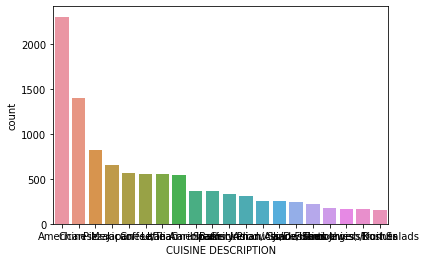

In [14]:
sns.countplot(x = "CUISINE DESCRIPTION", data = restaraunts, order=restaraunts['CUISINE DESCRIPTION'].value_counts().iloc[:20].index)

**1b answer:** American cuisine is the most popular.

1c) Plot a bar chart of the top 20 restaurant cuisines (found in the column CUISINE DESCRIPTION) found in the 10468 zip code (which includes Lehman). Which cuisine is most popular?

<AxesSubplot:xlabel='CUISINE DESCRIPTION', ylabel='count'>

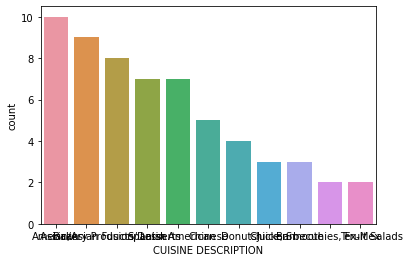

In [17]:
sns.countplot(x = "CUISINE DESCRIPTION", 
              data = restaraunts[restaraunts["ZIPCODE"] == 10468], 
              order= restaraunts[restaraunts["ZIPCODE"] == 10468]['CUISINE DESCRIPTION'].value_counts().iloc[:20].index)

**1c answer:** American cuisine is the most popular in the 10468 zipcode as well.

## Question 2

Is the distribution of cuisines in the 10468 zip code different than the distribution of cuisines in New York city as a whole?  As there are so many restaurants in NYC, we can assume the distribution of these restaurant cuisines is the population distribution.  We will use hypothesis testing of categorical data with multiple categories (Lab 25) to compare this NYC distribution with the distribution of restaurant cuisines in the 10468 zip code.

Our alternative hypothesis will be:
The distribution of cuisines in the 10468 zip code is different from the distribution of cuisines in all of New York city.

What is the null hypothesis?

**Answer:** The distribution of cuisines in the 10468 zip code is _not different_ from the distribution of cuisines in all of New York city.

### Question 3
Create a dataframe where the rows correspond to the difference cuisines (found in column `CUISINE DESCRIPTION`) and one column is the proportion of each cuisine in NYC and the other column is the proportion of each cuisine in the 10468 zip code.  

Hint:  See Lab 24, Section 3 although not that there we are adding the proportion from the random sample and here we want to add the proportions calculated from the data.

In [38]:
dist = pd.DataFrame()
t = pd.DataFrame()
t['Cuisine'] = restaraunts[restaraunts["ZIPCODE"] == 10468]['CUISINE DESCRIPTION'].value_counts().index.tolist()
t['10468'] = restaraunts[restaraunts["ZIPCODE"] == 10468]['CUISINE DESCRIPTION'].value_counts().tolist()

dist['Cuisine'] = restaraunts['CUISINE DESCRIPTION'].value_counts().index.tolist()
dist['NYC'] = restaraunts['CUISINE DESCRIPTION'].value_counts().tolist()

dist = dist.merge(t, on="Cuisine")

### Question 4
Using the dataframe you created in Question 3, compute the total variation distance between the proportion of cuisines in New York city and the proportions of cuisines in the 10468 zip code.  

Hint:  There may be missing proportions in the dataframe which need to be filled in with 0, which you can do with the code `df = df.fillna(0)`.

In [42]:
total_variation = abs(dist['NYC'] - dist['10468']).sum()

### Question 5
Find the distribution of the test statistic (the total variation distance) under the null hypothesis.  That is, do 1000 simulations of restaurant cuisines according to the proportion of cuisines in New York city.  You can do this by taking a random sample of the full DataFrame (ex. `df.sample(10)` takes a random sample of size 10 from the DataFrame `df`) and computing the proportion of each cuisine in this sample.

The number of restaurant cuisines sampled should be the number of restaurants in the 10468 zip code.  For each simulation, compute the total variation distance between the sampled proportions and the NYC cuisine proportions.

Plot a histogram of these distancs.

### Question 6
Use the data test statistic computed in Question 4 and the histogram from Question 5 to reject or fail to reject the null hypothesis.  What is your conclusion and why? 

**Answer:** 